In [1]:
datset_root_folder=r'''C:\Users\sooja\Downloads\archive (7)'''

In [2]:
pip install patchify # for patching the images

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [2]:
datset_name="Semantic segmentation dataset"

In [3]:
import os 
print(os.listdir(os.path.join(datset_root_folder,datset_name)))

['classes.json', 'Tile 1', 'Tile 2', 'Tile 3', 'Tile 4', 'Tile 5', 'Tile 6', 'Tile 7', 'Tile 8']


In [4]:
for path,subdir,files in os.walk(datset_root_folder):
    print(path)
    print("subdir"+str(subdir))
    print("files"+str(files))
    dirname=path.split(os.path.sep)[-1]
    print("dirname"+dirname)

C:\Users\sooja\Downloads\archive (7)
subdir['Semantic segmentation dataset']
files[]
dirnamearchive (7)
C:\Users\sooja\Downloads\archive (7)\Semantic segmentation dataset
subdir['Tile 1', 'Tile 2', 'Tile 3', 'Tile 4', 'Tile 5', 'Tile 6', 'Tile 7', 'Tile 8']
files['classes.json']
dirnameSemantic segmentation dataset
C:\Users\sooja\Downloads\archive (7)\Semantic segmentation dataset\Tile 1
subdir['images', 'masks']
files[]
dirnameTile 1
C:\Users\sooja\Downloads\archive (7)\Semantic segmentation dataset\Tile 1\images
subdir[]
files['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
dirnameimages
C:\Users\sooja\Downloads\archive (7)\Semantic segmentation dataset\Tile 1\masks
subdir[]
files['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'ima

In [5]:
for path,subdir,files in os.walk(os.path.join(datset_root_folder,datset_name)):
    dirname=path.split(os.path.sep)[-1]
    print(dirname)
    if dirname=="images":
        images=os.listdir(path)
        print(images)
        for i,image_name in enumerate(images):
            print(image_name)
   
        

Semantic segmentation dataset
Tile 1
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
Tile 2
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
Tile 3
images
['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg',

In [6]:
imagepatchsize=256

In [7]:
import cv2
from PIL import Image
import numpy as np
from patchify import patchify ## for patching the image
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [8]:
image=cv2.imread(f'{datset_root_folder}/{datset_name}/Tile 1/images/image_part_001.jpg',1)

In [9]:
image_patches=patchify(image,(imagepatchsize,imagepatchsize,3),step=imagepatchsize)

In [10]:
len(image_patches)

2

In [11]:
image_patches

array([[[[[[201, 195, 190],
           [225, 219, 214],
           [241, 232, 228],
           ...,
           [228, 219, 210],
           [219, 212, 203],
           [224, 217, 208]],

          [[226, 220, 215],
           [254, 248, 243],
           [255, 255, 251],
           ...,
           [238, 229, 220],
           [237, 230, 221],
           [243, 234, 225]],

          [[248, 241, 238],
           [255, 252, 249],
           [255, 255, 251],
           ...,
           [238, 228, 221],
           [235, 228, 219],
           [230, 221, 212]],

          ...,

          [[225, 220, 221],
           [209, 205, 204],
           [188, 187, 183],
           ...,
           [185, 174, 184],
           [218, 210, 221],
           [173, 168, 177]],

          [[196, 192, 191],
           [202, 198, 197],
           [221, 220, 216],
           ...,
           [137, 127, 139],
           [170, 163, 176],
           [171, 166, 175]],

          [[193, 188, 185],
           [201, 198, 194]

In [12]:
image_x=image_patches[0,0,:,:]
#minmax scaler
minmaxscaler=MinMaxScaler()
image_y=minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)


In [13]:
image_y.shape

(1, 256, 256, 3)

In [14]:
image_y[0].shape

(256, 256, 3)

In [15]:
(image.shape[0]//imagepatchsize)*imagepatchsize ## we will check the multiples of patch size in image

512

In [16]:
(image.shape[1]//imagepatchsize)*imagepatchsize  ## we will check the multiples of patch size in image

768

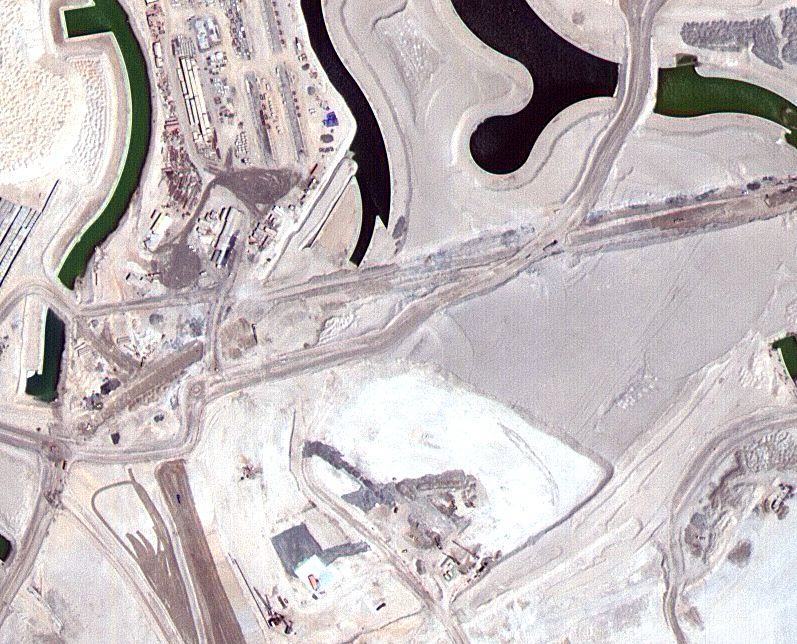

In [17]:
Image.fromarray(image)

In [18]:
image

array([[[201, 195, 190],
        [225, 219, 214],
        [241, 232, 228],
        ...,
        [255, 236, 231],
        [254, 234, 229],
        [255, 239, 234]],

       [[226, 220, 215],
        [254, 248, 243],
        [255, 255, 251],
        ...,
        [252, 231, 229],
        [247, 228, 223],
        [242, 223, 218]],

       [[248, 241, 238],
        [255, 252, 249],
        [255, 255, 251],
        ...,
        [253, 234, 231],
        [252, 235, 232],
        [245, 228, 225]],

       ...,

       [[211, 200, 203],
        [220, 209, 212],
        [221, 211, 217],
        ...,
        [220, 229, 242],
        [234, 243, 255],
        [235, 244, 255]],

       [[209, 198, 201],
        [219, 208, 211],
        [220, 210, 216],
        ...,
        [213, 222, 235],
        [222, 231, 244],
        [218, 227, 240]],

       [[213, 202, 205],
        [210, 199, 202],
        [201, 191, 197],
        ...,
        [223, 232, 245],
        [233, 242, 255],
        [230, 239, 252]]

In [19]:
image.shape

(644, 797, 3)

In [20]:
image_datset=[]
mask_dataset=[]
types=['images','masks']
for image_type in types:
    if image_type=="images":
        imageext='jpg'
    elif image_type=="masks":
        imageext='png'
    for tile_id in range(1,8):
        for image_id in range(1,20):
            image=cv2.imread(f'{datset_root_folder}/{datset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{imageext}',1)
            if image is not None:
                      if image_type=="masks":
                        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        #             print(image.shape)
                      sizex=(image.shape[1]//imagepatchsize)*imagepatchsize 
                      sizey=(image.shape[0]//imagepatchsize)*imagepatchsize
        #               print("{}---{}---{}".format(image.shape,sizex,sizey))
                      image=Image.fromarray(image)
                      image=image.crop((0,0,sizex,sizey))
        #               print("({},{})".format(image.size[0],image.size[1]))
                      image=np.array(image)
                      patched_images=patchify(image,(imagepatchsize,imagepatchsize,3),step=imagepatchsize)
        #               print(len(patched_images))
                      for i in range(patched_images.shape[0]):
                            for j in range(patched_images.shape[1]):
                                
        #                         print(individual_patched_image.shape)
                                if image_type=="images":
                                    individual_patched_image=patched_images[i,j,:,:]
        #                         print(individual_patched_image.shape)
                                    individual_patched_image=minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                                    individual_patched_image=individual_patched_image[0]
                                    image_datset.append(individual_patched_image)
                                else:
                                    individual_patched_mask=patched_images[i,j,:,:]
        #                         print(individual_patched_image.shape)
                                    individual_patched_mask=individual_patched_mask[0]
                                    mask_dataset.append(individual_patched_mask)
#     elif image_type=="mask":
#         imageext="png"
#         for tile_id in range(1,8):
#             for image_id in range(1,20):
#                 image=cv2.imread(f'{datset_root_folder}/{datset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{imageext}',1)
#                 if image is not None:
#         #             print(image.shape)
#                       sizex=(image.shape[1]//imagepatchsize)*imagepatchsize 
#                       sizey=(image.shape[0]//imagepatchsize)*imagepatchsize
#         #               print("{}---{}---{}".format(image.shape,sizex,sizey))
#                       image=Image.fromarray(image)
#                       image=image.crop((0,0,sizex,sizey))
#         #               print("({},{})".format(image.size[0],image.size[1]))
#                       image=np.array(image)
#                       patched_images=patchify(image,(imagepatchsize,imagepatchsize,3),step=imagepatchsize)
#         #               print(len(patched_images))
#                       for i in range(patched_images.shape[0]):
#                             for j in range(patched_images.shape[1]):
#                                 individual_patched_image=patched_images[i,j,:,:]
#         #                         print(individual_patched_image.shape)
#                                 individual_patched_image=minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
#                                 individual_patched_image=individual_patched_image[0]
#         #                         print(individual_patched_image.shape)
#                                 mask_dataset.append(individual_patched_image)
        

In [21]:
len(image_datset)

945

In [22]:
len(mask_dataset)

945

In [23]:
image_dataset=np.array(image_datset)
mask_dataset=np.array(mask_dataset)

In [24]:
from matplotlib import pyplot as plt
import random

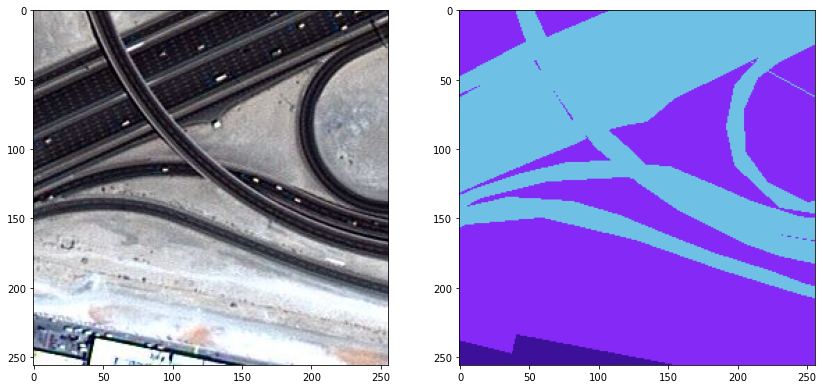

In [25]:
randomind=random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[randomind])
plt.subplot(122)
plt.imshow(mask_dataset[randomind])

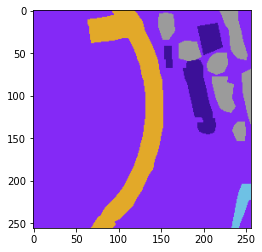

In [26]:
plt.imshow(mask_dataset[0])

In [27]:
mask_dataset[0][-1]

array([[132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41, 246],
       [132,  41

In [28]:
class_building='#3C1098'
class_building=class_building.lstrip('#')

In [29]:
class_building=np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))

In [30]:
class_land='#8429F6'
class_land=class_land.lstrip('#')
class_land=np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))

In [31]:
class_road='#6EC1E4'
class_road=class_road.lstrip('#')
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))

In [32]:
class_vegetation='#FEDD3A'
class_vegetation=class_vegetation.lstrip('#')
class_vegetation=np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4)))

In [33]:
class_water='#E2A929'
class_water=class_water.lstrip('#')
class_water=np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4)))

In [34]:
class_unlabeled='#9B9B9B'
class_unlabeled=class_unlabeled.lstrip('#')
class_unlabeled=np.array(tuple(int(class_unlabeled[i:i+2],16) for i in (0,2,4)))

In [35]:
label=individual_patched_mask


In [36]:
def rgb_to_label(label):
    label_segement=np.zeros(label.shape,dtype=np.uint8)
    label_segement[np.all(label==class_water,axis=-1)]=0
    label_segement[np.all(label==class_land,axis=-1)]=1
    label_segement[np.all(label==class_road,axis=-1)]=2
    label_segement[np.all(label==class_building,axis=-1)]=3
    label_segement[np.all(label==class_vegetation,axis=-1)]=4
    label_segement[np.all(label==class_unlabeled,axis=-1)]=5
    label_segement = label_segement[:,:,0]
#     label_segement = np.argmax(label_segement)
    return label_segement
    

In [37]:
labels=[]
for i in range(mask_dataset.shape[0]):
    label=rgb_to_label(mask_dataset[i])
    labels.append(label)
    
    

In [38]:
np.array(labels)

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 5, 5, ..., 0, 0, 0],
        [1, 5, 5, ..., 0, 0, 0],
        [1, 1, 5, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [39]:
#for taking in single row
labels=np.expand_dims(labels,axis=3)

In [40]:
labels[3]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [41]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


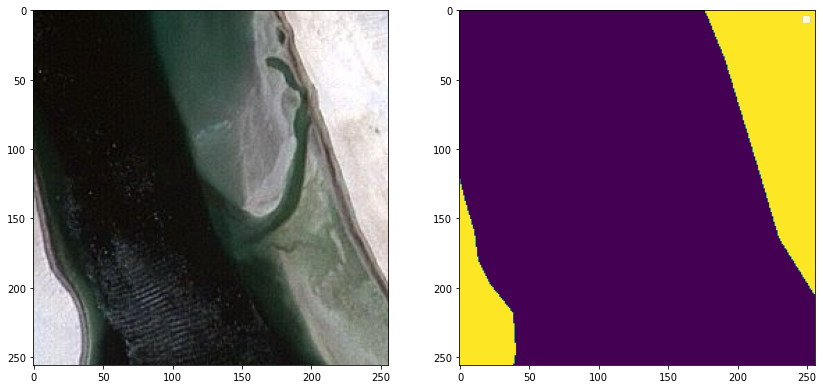

In [44]:
randomind=random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[randomind])
plt.subplot(122)
plt.legend()
plt.imshow(labels[randomind][:,:,0])

In [43]:
master_training_dataset=image_dataset

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
total_classes=np.unique(labels)

In [46]:
total_classes=len(total_classes)

In [47]:
from tensorflow.keras.utils import to_categorical

In [48]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [49]:

X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [50]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [51]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]
     


## Model prediction and training


In [52]:
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers import concatenate,BatchNormalization,Dropout,Lambda

In [53]:
from keras import backend as k

In [54]:
def jaccardcoeff(y_true,y_pred):
    y_true_flatten=k.flatten(y_true)
    y_pred_flatten=k.flatten(y_pred)
    intersection=k.sum(y_true_flatten*y_pred_flatten)
    final_coeff_value=intersection/k.sum(y_true_flatten)+k.sum(y_pred_flatten)
    return final_coeff_value

### Unet Architecture

In [57]:
def multi_unet_model(n_classes=5,image_height=256,image_width=256,image_channels=1):
    inputs=Input((image_height,image_width,image_channels))
    source_input=inputs
    c1=Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(source_input)  #filters,kernels,
    c1=Dropout(0.2)(c1)
    c1=Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c1)
    p1=MaxPooling2D((2,2))(c1)
    c2=Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p1)  #filters,kernels,
    c2=Dropout(0.2)(c2)
    c2=Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c2)
    p2=MaxPooling2D((2,2))(c2)
    
    c3=Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p2)  #filters,kernels,
    c3=Dropout(0.2)(c3)
    c3=Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c3)
    p3=MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model
### giving error

In [58]:
metrics=['accuracy',jaccardcoeff]

In [59]:
def get_deeplearning_model():
    return multi_unet_model(n_classes=total_classes,image_height=image_height,image_width=image_width,image_channels=image_channels)
    

In [60]:
model=get_deeplearning_model()

In [161]:

def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
    inputs = Input((image_height, image_width, image_channels))

    source_input = inputs

    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [145]:
# def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
#     inputs = Input((image_height, image_width, image_channels))
#     source_input = inputs
#     c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
#     c1 = Dropout(0.2)(c1)
#     c1 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
#     p1 = MaxPooling2D((2, 2))(c1)
#     c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
#     c2 = Dropout(0.2)(c2)
#     c2 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
#     p2 = MaxPooling2D((2, 2))(c2)
#     c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
#     c3 = Dropout(0.2)(c3)
#     c3 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal")(c3)
#     p3 = MaxPooling2D((2, 2))(c3)

#     c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
#     c4 = Dropout(0.2)(c4)
#     c4 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
#     p4 = MaxPooling2D((2, 2))(c4)
#     c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
#     c5 = Dropout(0.2)(c5)
#     c5 = Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

#     u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c5)
#     u6 = concatenate([u6, c4])
#     c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
#     c6 = Dropout(0.2)(c6)
#     c6 = Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)
#     U7 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c6)
#     U7 = concatenate([U7, c3])
#     c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(U7)
#     c7 = Dropout(0.2)(c7)
#     c7 = Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)
#     U8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same")(c7)
#     U8 = concatenate([U8, c2])
#     c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(U8)
#     c8 = Dropout(0.2)(c8)
#     c8 = Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)
#     U9 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same")(c8)
#     U9 = concatenate([U9, c1], axis=3)
#     c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(U9)
#     c9 = Dropout(0.2)(c9)
#     c9 = Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)
#     outputs = Conv2D(n_classes, (1, 1), activation="softmax")(c9)
#     model = Model(inputs=[inputs], outputs=[outputs])
#     return model

### Genreating Loss function

In [61]:
pip install -U segmentation-models


  Using cached segmentation_models-1.0.1-py3-none-any.whl (33 kB)
  Using cached image_classifiers-1.0.0-py3-none-any.whl (19 kB)
  Attempting uninstall: image-classifiers
    Found existing installation: image-classifiers 0.2.0
    Uninstalling image-classifiers-0.2.0:
      Successfully uninstalled image-classifiers-0.2.0
  Attempting uninstall: segmentation-models
    Found existing installation: segmentation-models 0.2.1
    Uninstalling segmentation-models-0.2.1:
      Successfully uninstalled segmentation-models-0.2.1


In [55]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [56]:
weights=[0.166,0.166,0.166,0.166,0.166,0.166]

In [57]:
dice_loss=sm.losses.DiceLoss(class_weights=weights)

In [58]:
focal_loss=sm.losses.CategoricalFocalLoss()

In [59]:
total_loss=focal_loss+(1*dice_loss)

model compiling

In [60]:
import tensorflow as tf

In [61]:
tf.keras.backend.clear_session()

In [62]:
model.compile('adam',loss=total_loss,metrics=metrics)

NameError: name 'model' is not defined

In [ ]:
model.summary()

In [70]:
X_train=np.array(X_train)

In [71]:
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [72]:
model_history=model.fit(X_train,y_train,batch_size=16,verbose=1,epochs=5,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/5
 1/51 [..............................] - ETA: 8:56 - loss: 1.1238 - accuracy: 0.0873 - jaccardcoeff: 1048576.1250

KeyboardInterrupt: 

In [72]:
history_a=model_history

In [73]:
loss=history_a.history['loss']

In [74]:
val_loss=history_a.history['val_loss']

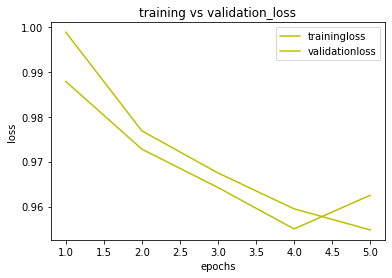

In [75]:
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label="trainingloss")
plt.plot(epochs,val_loss,'y',label="validationloss")
plt.title("training vs validation_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

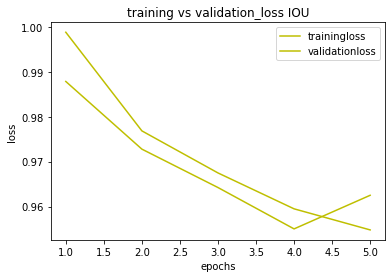

In [76]:
jaccordcoeff=history_a.history['jaccardcoeff']
val_jaccordcoef=history_a.history['val_jaccardcoeff']
epochs=range(1,len(jaccordcoeff)+1)
plt.plot(epochs,loss,'y',label="trainingloss")
plt.plot(epochs,val_loss,'y',label="validationloss")
plt.title("training vs validation_loss IOU")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [77]:
model_history.params

{'verbose': 1, 'epochs': 5, 'steps': 51}

In [78]:
y_pred=model.predict(X_test)

5/5 [==============================] - 6s 1s/step


In [79]:
y_pred

array([[[[1.05642423e-01, 3.09883446e-01, 1.98688194e-01,
          1.41919881e-01, 1.69476479e-01, 7.43895918e-02],
         [8.55768472e-02, 2.46495068e-01, 2.24900991e-01,
          1.73000246e-01, 1.90711826e-01, 7.93149322e-02],
         [9.05261412e-02, 2.08976105e-01, 2.17639133e-01,
          1.97873548e-01, 2.03608185e-01, 8.13768730e-02],
         ...,
         [1.22673683e-01, 1.47068426e-01, 1.50871605e-01,
          1.05811931e-01, 3.75165880e-01, 9.84084159e-02],
         [1.35172099e-01, 1.51454344e-01, 1.61752164e-01,
          1.39194742e-01, 3.02546859e-01, 1.09879792e-01],
         [1.60103574e-01, 1.29903451e-01, 1.66309476e-01,
          1.29666790e-01, 2.76066154e-01, 1.37950510e-01]],

        [[5.61056659e-02, 3.29029262e-01, 2.12039381e-01,
          2.27770790e-01, 1.30286813e-01, 4.47681397e-02],
         [3.90810482e-02, 2.64505714e-01, 2.09085152e-01,
          2.92950600e-01, 1.68438762e-01, 2.59386301e-02],
         [4.63956632e-02, 2.29801536e-01, 2.2072

In [80]:
y_pred_argmax=np.argmax(y_pred,axis=3)

In [81]:
y_pred_argmax

array([[[1, 1, 2, ..., 4, 4, 4],
        [1, 3, 3, ..., 4, 4, 4],
        [1, 1, 3, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       [[4, 4, 4, ..., 1, 1, 4],
        [4, 4, 4, ..., 1, 1, 1],
        [4, 4, 3, ..., 1, 1, 1],
        ...,
        [4, 4, 4, ..., 2, 2, 4],
        [4, 4, 4, ..., 2, 2, 4],
        [4, 4, 4, ..., 3, 2, 4]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [82]:
y_test_argmax=np.argmax(y_test,axis=3)

In [83]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [84]:
   

test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 78ms/step


In [85]:
prediction=model.predict(test_image_input)
predicted_image=np.argmax(prediction,axis=3)

1/1 [==============================] - 0s 80ms/step


In [86]:
predicted_image

array([[[1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]]], dtype=int64)

In [87]:
predicted_image=predicted_image[0,:,:]

In [88]:
predicted_image

array([[1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       ...,
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4]], dtype=int64)

In [73]:
import keras

In [74]:
print(keras.__version__)

2.9.0


In [28]:
plt.imshow(test_image)

NameError: name 'plt' is not defined

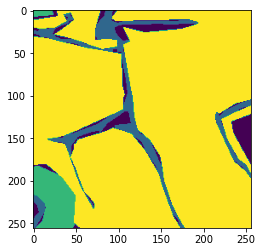

In [92]:
plt.imshow(ground_truth_image)

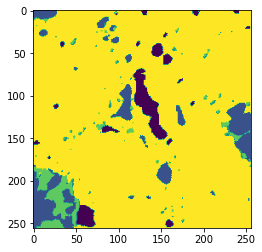

In [93]:
plt.imshow(predicted_image)

In [94]:
plt.show()

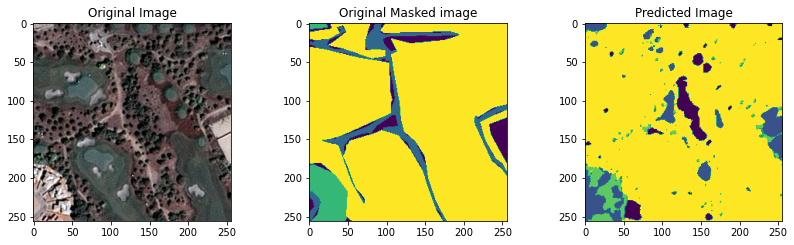

In [95]:

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [96]:

model.save("satellite_segmentation_full.h5")

In [76]:
from keras.utils.vis_utils import plot_model

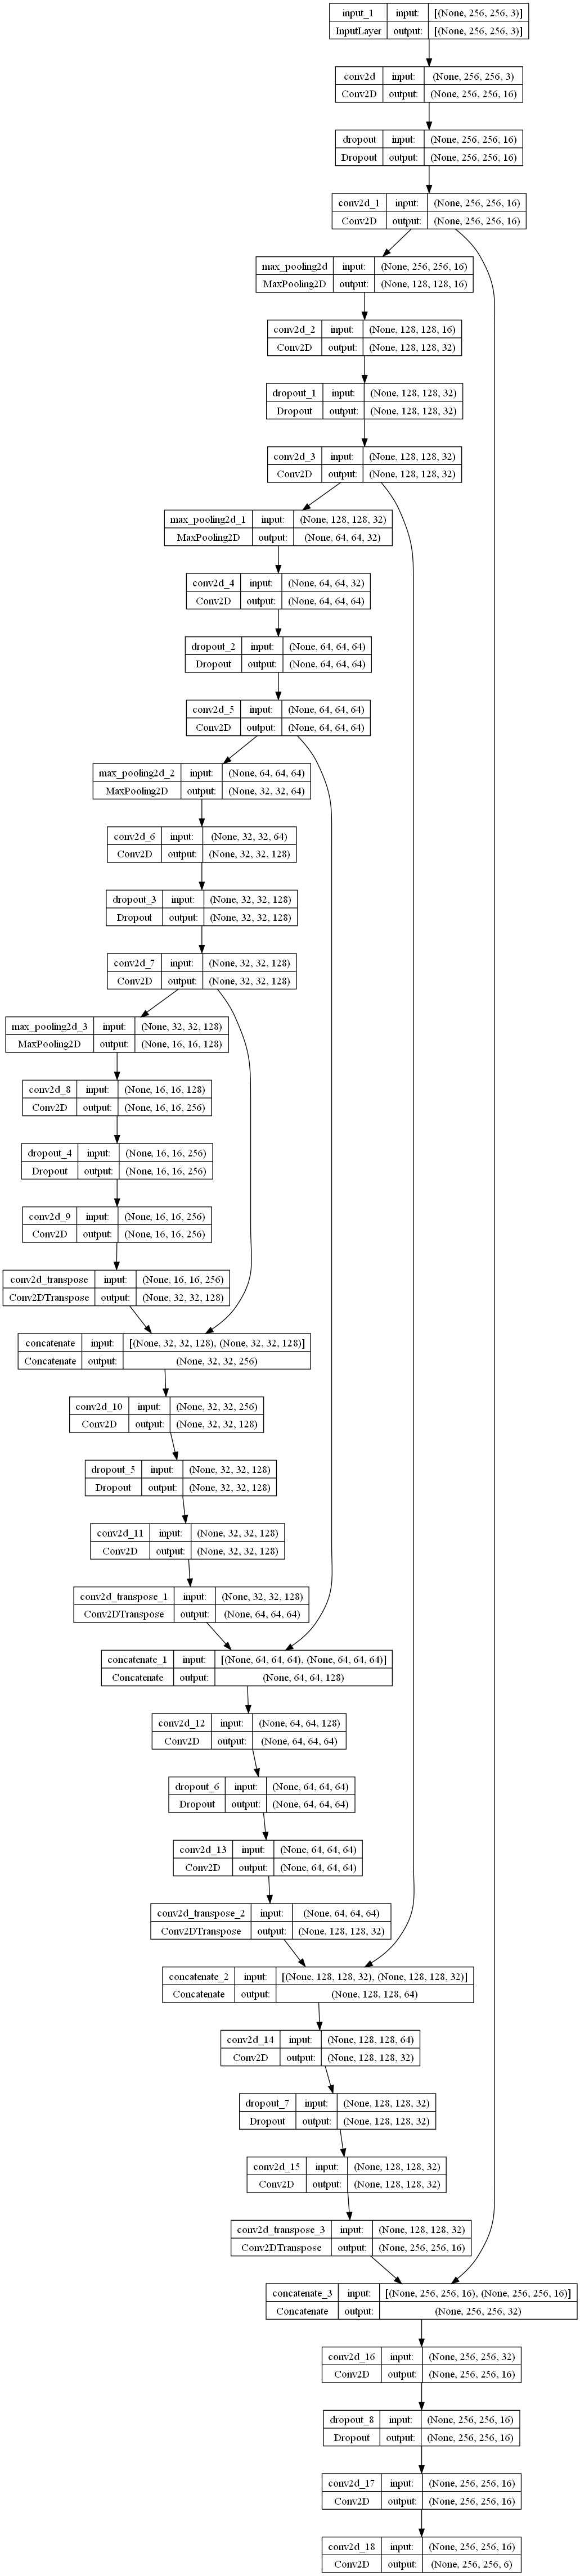

In [77]:

plot_model(model, to_file="satellite_model_plot.png", show_shapes=True, show_layer_names=True)

In [122]:
pip install graphviz

In [123]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.Model import load_model

ModuleNotFoundError: No module named 'keras.Model'

In [3]:
from keras.models import load_model
model = load_model('satellite_segmentation_full.h5')

ValueError: Unknown loss function: focal_loss_plus_1dice_loss. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [78]:
class PlotLoss(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.jaccard_coef = []
        self.val_jaccard_coef = []

        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        # self.losses.append(logs.get('loss'))
        # self.val_losses.append(logs.get('val_loss'))

        self.jaccard_coef.append(logs.get('jaccard_coef'))
        self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

        self.i += 1

        clear_output(wait=True)
        # plt.plot(self.x, self.losses, label="loss")
        # plt.plot(self.x, self.val_losses, label="val_loss")

        plt.plot(self.x, self.jaccard_coef, label="jaccard_coef")
        plt.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")

        plt.legend()
        plt.show();

plot_loss = PlotLoss()


In [79]:

class PlotLossEx(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []

        self.losses = []
        self.val_losses = []

        self.jaccard_coef = []
        self.val_jaccard_coef = []

        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)

        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

        self.jaccard_coef.append(logs.get('jaccard_coef'))
        self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))

        self.i += 1

        plt.figure(figsize=(14,8))
        f, (graph1, graph2) = plt.subplots(1,2, sharex=True)

        clear_output(wait=True)

        graph1.set_yscale('log')
        graph1.plot(self.x, self.losses, label="loss")
        graph1.plot(self.x, self.val_losses, label="val_loss")
        graph1.legend()

        graph2.set_yscale('log')
        graph2.plot(self.x, self.jaccard_coef, label="jaccard_coef")
        graph2.plot(self.x, self.val_jaccard_coef, label="val_jaccard_coef")
        graph2.legend()

        plt.show();

plot_loss = PlotLossEx()

In [105]:

model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(X_test, y_test),
                          callbacks=[plot_loss],
                          shuffle=False)

Epoch 1/10
 4/51 [=>............................] - ETA: 6:12 - loss: 0.9541 - accuracy: 0.7526 - jaccardcoeff: 1048576.7500

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000018D498A8CA0>
Traceback (most recent call last):
  File "C:\Users\sooja\anaconda3\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [86]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(X_test, y_test),
                          callbacks=[WandbCallback()],
                          shuffle=False)

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 1.0026 - accuracy: 0.5381 - jaccardcoeff: 1031870.8125

INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best)... Done. 0.1s


51/51 [==============================] - 375s 7s/step - loss: 1.0026 - accuracy: 0.5381 - jaccardcoeff: 1031870.8125 - val_loss: 0.9944 - val_accuracy: 0.6050 - val_jaccardcoeff: 1034012.8750
Epoch 2/10
51/51 [==============================] - ETA: 0s - loss: 0.9874 - accuracy: 0.6298 - jaccardcoeff: 1031870.8750

INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best)... Done. 0.1s


51/51 [==============================] - 355s 7s/step - loss: 0.9874 - accuracy: 0.6298 - jaccardcoeff: 1031870.8750 - val_loss: 0.9775 - val_accuracy: 0.6915 - val_jaccardcoeff: 1034012.8750
Epoch 3/10
51/51 [==============================] - ETA: 0s - loss: 0.9654 - accuracy: 0.7211 - jaccardcoeff: 1031871.0000

INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best)... Done. 0.1s


51/51 [==============================] - 368s 7s/step - loss: 0.9654 - accuracy: 0.7211 - jaccardcoeff: 1031871.0000 - val_loss: 0.9726 - val_accuracy: 0.6932 - val_jaccardcoeff: 1034013.1250
Epoch 4/10
51/51 [==============================] - ETA: 0s - loss: 0.9532 - accuracy: 0.7565 - jaccardcoeff: 1031871.0000

INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best)... Done. 0.1s


51/51 [==============================] - 387s 8s/step - loss: 0.9532 - accuracy: 0.7565 - jaccardcoeff: 1031871.0000 - val_loss: 0.9681 - val_accuracy: 0.7036 - val_jaccardcoeff: 1034013.1250
Epoch 5/10
51/51 [==============================] - 292s 6s/step - loss: 0.9454 - accuracy: 0.7723 - jaccardcoeff: 1031871.0625 - val_loss: 0.9760 - val_accuracy: 0.6922 - val_jaccardcoeff: 1034013.0000
Epoch 6/10
51/51 [==============================] - 877s 17s/step - loss: 0.9407 - accuracy: 0.7848 - jaccardcoeff: 1031871.0625 - val_loss: 0.9806 - val_accuracy: 0.6904 - val_jaccardcoeff: 1034013.1250
Epoch 7/10
51/51 [==============================] - ETA: 0s - loss: 0.9369 - accuracy: 0.7949 - jaccardcoeff: 1031871.0625

INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best)... Done. 0.1s


51/51 [==============================] - 320s 6s/step - loss: 0.9369 - accuracy: 0.7949 - jaccardcoeff: 1031871.0625 - val_loss: 0.9621 - val_accuracy: 0.7321 - val_jaccardcoeff: 1034013.1250
Epoch 8/10
51/51 [==============================] - ETA: 0s - loss: 0.9324 - accuracy: 0.8078 - jaccardcoeff: 1031871.0625

INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best)... Done. 0.1s


51/51 [==============================] - 312s 6s/step - loss: 0.9324 - accuracy: 0.8078 - jaccardcoeff: 1031871.0625 - val_loss: 0.9600 - val_accuracy: 0.7470 - val_jaccardcoeff: 1034013.2500
Epoch 9/10
51/51 [==============================] - 289s 6s/step - loss: 0.9313 - accuracy: 0.8097 - jaccardcoeff: 1031871.0625 - val_loss: 0.9639 - val_accuracy: 0.7317 - val_jaccardcoeff: 1034013.1250
Epoch 10/10
51/51 [==============================] - ETA: 0s - loss: 0.9283 - accuracy: 0.8181 - jaccardcoeff: 1031871.0625

INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\sooja\wandb\run-20230616_174640-apozbybi\files\model-best)... Done. 0.1s


51/51 [==============================] - 533s 11s/step - loss: 0.9283 - accuracy: 0.8181 - jaccardcoeff: 1031871.0625 - val_loss: 0.9591 - val_accuracy: 0.7478 - val_jaccardcoeff: 1034013.2500


In [109]:
!pip install wandb

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=079a1e2f0c78a7a6d4aba80ecde3bd09c587aa6ea4c51d4bc97c536778e7b52c
  Stored in directory: c:\users\sooja\appdata\local\pip\cache\wheels\b7\0a\67\ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9


In [82]:
!wandb login 9835dbc2dde3f5d8755c00bcf092d06f5ee32982

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\sooja/.netrc


In [81]:
import wandb
from wandb.keras import WandbCallback 
import random

# start a new wandb run to track this script

# simulate training


In [85]:
wandb.init(project="satellite-segmentation",entity="soojalkalra1492")

In [119]:
!wandb login --relogin

wandb: ERROR Find detailed error logs at: C:\Users\sooja\wandb\debug-cli.sooja.log
Error: api_key not configured (no-tty). call wandb login [your_api_key]


In [84]:
!wandb login --relogin 9835dbc2dde3f5d8755c00bcf092d06f5ee32982

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\sooja/.netrc


In [94]:
wandb.log({"accuracy":jaccardcoeff,"loss":total_loss})

model save and reloading with custom loss

In [95]:
model.save("satellite-imagery.h5")

In [65]:
from keras.models import load_model

In [2]:
model.loss.name

NameError: name 'model' is not defined

In [66]:
saved_model=load_model("satellite-imagery.h5",custom_objects=({'focal_loss_plus_1dice_loss':total_loss,'jaccardcoeff':jaccardcoeff})) ### put name recieved from model.loss.name

In [99]:
pip install keract

In [63]:
import keract as ke

In [67]:
image=Image.open(f'{datset_root_folder}/{datset_name}/Tile 1/images/image_part_001.jpg')
image=image.resize((256,256))
image=np.array(image)
image=np.expand_dims(image,axis=0)

In [68]:
prediction=saved_model.predict(image)

1/1 [==============================] - 1s 1s/step


In [69]:
predictedimage=np.argmax(prediction,axis=3)
predictedimage=predictedimage[0,:,:]


In [73]:
import matplotlib.pyplot as plt

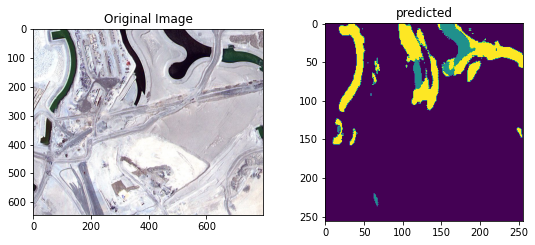

In [71]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open(f'{datset_root_folder}/{datset_name}/Tile 1/images/image_part_001.jpg'))
plt.subplot(232)
plt.title("predicted")
plt.imshow(predictedimage)

In [74]:
activations=ke.get_activations(saved_model,image,nodes_to_evaluate=None,output_format='simple',auto_compile=True)## image we use for prediction

In [75]:
ke.display_activations(activations,cmap='Accent',save=True)

input_1 (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
dropout (1, 256, 256, 16) 
conv2d_1 (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_2 (1, 128, 128, 32) 
dropout_1 (1, 128, 128, 32) 
conv2d_3 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_4 (1, 64, 64, 64) 
dropout_2 (1, 64, 64, 64) 
conv2d_5 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
conv2d_6 (1, 32, 32, 128) 
dropout_3 (1, 32, 32, 128) 
conv2d_7 (1, 32, 32, 128) 
max_pooling2d_3 (1, 16, 16, 128) 
conv2d_8 (1, 16, 16, 256) 
dropout_4 (1, 16, 16, 256) 
conv2d_9 (1, 16, 16, 256) 
conv2d_transpose (1, 32, 32, 128) 
concatenate (1, 32, 32, 256) 
conv2d_10 (1, 32, 32, 128) 
dropout_5 (1, 32, 32, 128) 
conv2d_11 (1, 32, 32, 128) 
conv2d_transpose_1 (1, 64, 64, 64) 
concatenate_1 (1, 64, 64, 128) 
conv2d_12 (1, 64, 64, 64) 
dropout_6 (1, 64, 64, 64) 
conv2d_13 (1, 64, 64, 64) 
conv2d_transpose_2 (1, 128, 128, 32) 
concatenate_2 (1, 128, 128, 64) 
conv2d_14 (1, 128, 128, 32) 
dropout_7 (1, 128, 128, 32) 
conv2

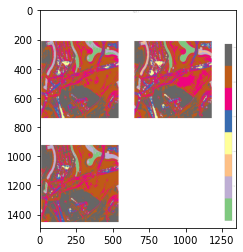

In [76]:
plt.imshow(Image.open('0_input_1.png'))

In [79]:
image=Image.open(f'{datset_root_folder}/{datset_name}/Tile 1/images/image_part_001.jpg')
image=image.resize((256,256))
image=np.array(image)
image=image.astype(np.float32)


In [80]:
ke.display_heatmaps(activations,image,save=True)

input_1 (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
dropout (1, 256, 256, 16) 
conv2d_1 (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_2 (1, 128, 128, 32) 
dropout_1 (1, 128, 128, 32) 
conv2d_3 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_4 (1, 64, 64, 64) 
dropout_2 (1, 64, 64, 64) 
conv2d_5 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
conv2d_6 (1, 32, 32, 128) 
dropout_3 (1, 32, 32, 128) 
conv2d_7 (1, 32, 32, 128) 
max_pooling2d_3 (1, 16, 16, 128) 
conv2d_8 (1, 16, 16, 256) 
dropout_4 (1, 16, 16, 256) 
conv2d_9 (1, 16, 16, 256) 
conv2d_transpose (1, 32, 32, 128) 
concatenate (1, 32, 32, 256) 
conv2d_10 (1, 32, 32, 128) 
dropout_5 (1, 32, 32, 128) 
conv2d_11 (1, 32, 32, 128) 
conv2d_transpose_1 (1, 64, 64, 64) 
concatenate_1 (1, 64, 64, 128) 
conv2d_12 (1, 64, 64, 64) 
dropout_6 (1, 64, 64, 64) 
conv2d_13 (1, 64, 64, 64) 
conv2d_transpose_2 (1, 128, 128, 32) 
concatenate_2 (1, 128, 128, 64) 
conv2d_14 (1, 128, 128, 32) 
dropout_7 (1, 128, 128, 32) 
conv2